In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
imgs_path = "./German-Traffic-Sign/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

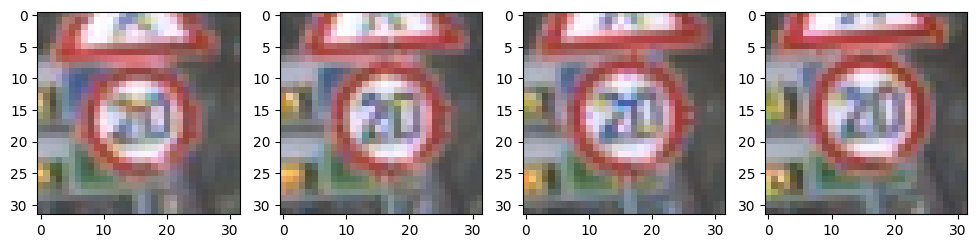

In [6]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [7]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

In [9]:
model = models.Sequential() 

model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())

model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

model.add(layers.Dense(1000,activation='relu'))

model.add(layers.Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=20,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Epoch 1/20
491/491 [==============================] - 285s 576ms/step - loss: 1.4699 - accuracy: 0.5824 - val_loss: 0.2934 - val_accuracy: 0.9102
Epoch 2/20
491/491 [==============================] - 284s 578ms/step - loss: 0.1955 - accuracy: 0.9385 - val_loss: 0.1054 - val_accuracy: 0.9658
Epoch 3/20
491/491 [==============================] - 293s 598ms/step - loss: 0.1101 - accuracy: 0.9666 - val_loss: 0.0890 - val_accuracy: 0.9719
Epoch 4/20
491/491 [==============================] - 290s 591ms/step - loss: 0.0945 - accuracy: 0.9733 - val_loss: 0.0597 - val_accuracy: 0.9870
Epoch 5/20
491/491 [==============================] - 288s 586ms/step - loss: 0.0818 - accuracy: 0.9784 - val_loss: 0.1679 - val_accuracy: 0.9763
Epoch 6/20
491/491 [==============================] - 287s 585ms/step - loss: 0.1001 - accuracy: 0.9751 - val_loss: 0.0454 - val_accuracy: 0.9908
Epoch 7/20
491/491 [==============================] - 288s 586ms/step - loss: 0.0587 - accuracy: 0.9842 - val_loss: 0.0546 -

Text(0.5, 1.0, 'Loss')

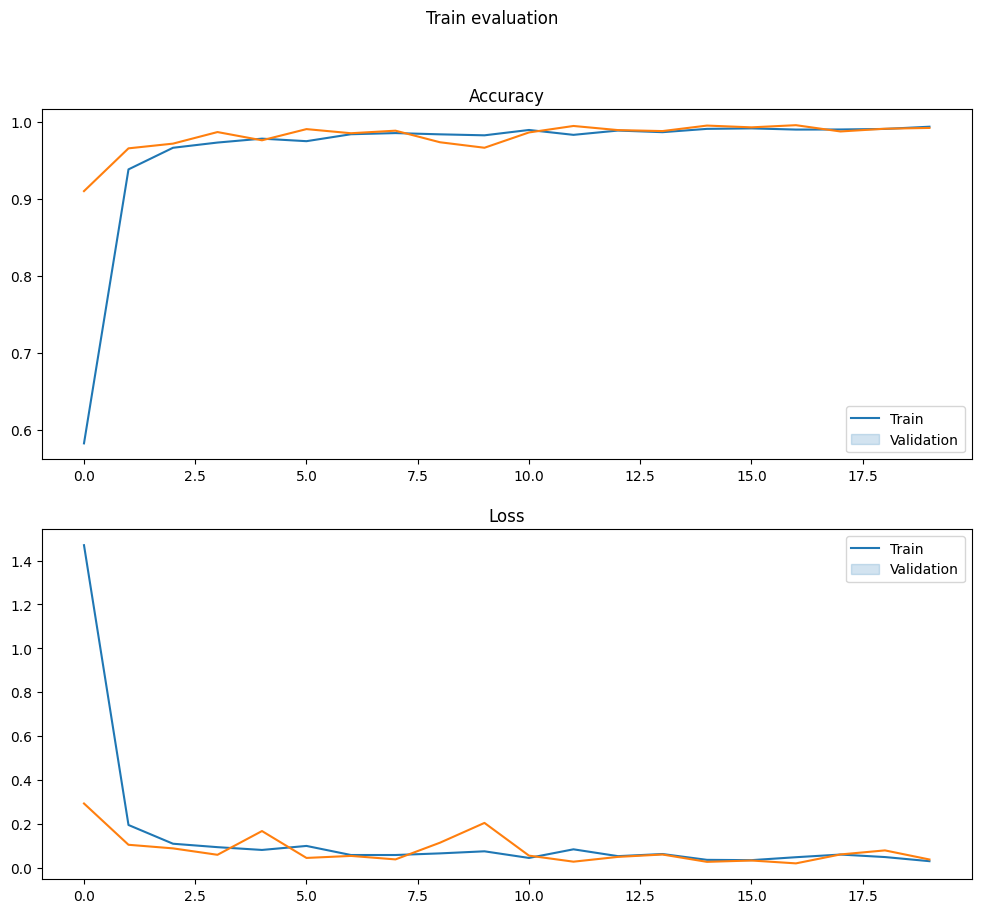

In [11]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [12]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

123/123 [==============================] - 7s 55ms/step
-Acuracy achieved: 98.98%
-Accuracy by model was: 99.39%
-Accuracy by validation was: 99.23%
